# In-Depth Exploratory Data Analysis (EDA) of Netflix's Content strategy

## 1. Setup and Data Loading

In [3]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load the dataset
df = pd.read_csv("netflix_titles.csv")

# Display the first few rows to get an idea of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## 1.5. Initial Data Inspection

In [5]:
# Check the dimensions of the dataset (rows, columns)
print("Shape of the dataset:", df.shape)

# Get a concise summary of the dataframe
print("\nDataset Info:")
df.info()

Shape of the dataset: (7787, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


### Brief Insights from Initial Checks
- Size: The dataset has 7,787 rows and 12 columns.

- Missing Data: There are significant gaps in the director, cast, and country columns that must be addressed.

- Wrong Data Type: The date_added column is stored as text (object) instead of a date, which needs to be converted for any time-based analysis.

## 2. Data Cleaning and Preprocessing

In [6]:
# Get a summary of missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Fill missing 'director' and 'cast' with 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Fill missing 'country' with the most common country
df['country'].fillna(df['country'].mode()[0], inplace=True)

# Drop the few rows with missing 'date_added' and 'rating'
df.dropna(subset=['date_added', 'rating'], inplace=True)

# First, remove extra spaces from the 'date_added' column, then convert to datetime
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

# Create new columns for the year and month the content was added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Confirm that all missing values have been handled
print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Missing values after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
month_added     0
dtype: int64


C:\Users\Asus\AppData\Local\Temp\ipykernel_21096\1907121383.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_21096\1907121383.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [7]:
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


### Q1. How has the distribution of content ratings changed over time?

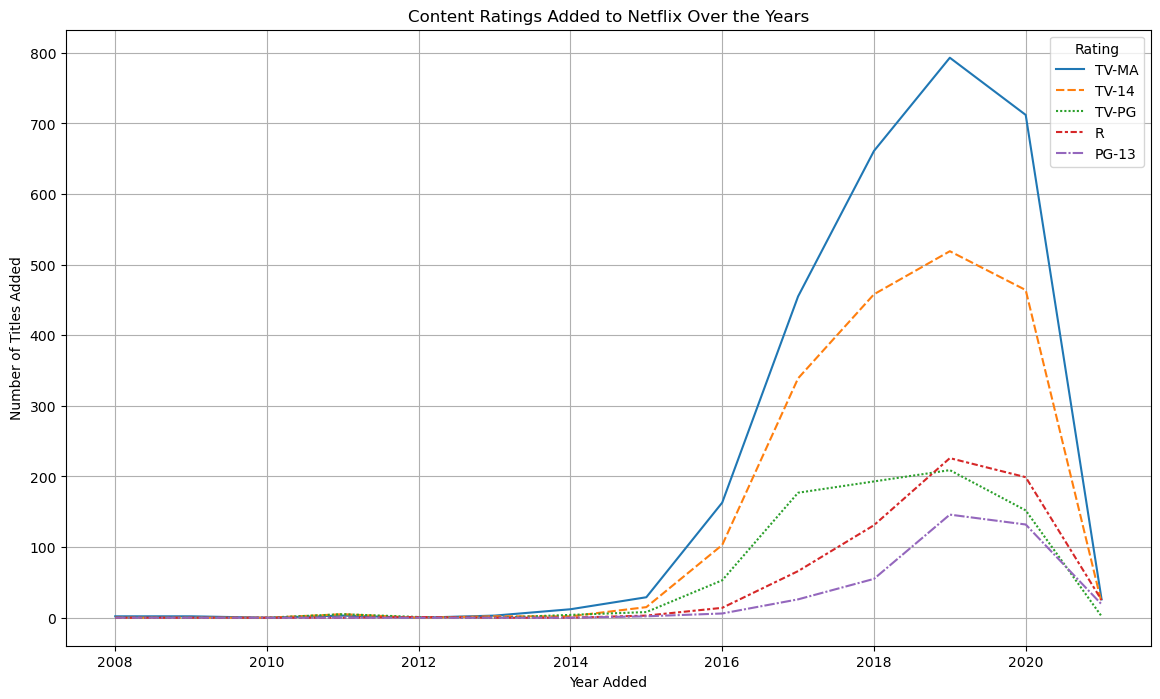

In [8]:
# Group the data by year and rating to see the trends
rating_over_time = df.groupby(['year_added', 'rating']).size().unstack().fillna(0)

# Create the line plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=rating_over_time[['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13']])
plt.title('Content Ratings Added to Netflix Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles Added')
plt.legend(title='Rating')
plt.grid(True)
plt.show()

### Insights from the Content Ratings Trend

- **A Clear Shift Towards Mature Audiences:** The most dramatic trend is the explosive growth of "TV-MA" (Mature Audiences) and "TV-14" (Parents Strongly Cautioned) rated content, especially after 2015. This indicates a deliberate strategic pivot to attract and retain adult and older teenage viewers.

- **The Post-2015 Content Boom:** The chart shows a significant increase in the number of titles added across all major ratings starting around 2015-2016. This timeline coincides with Netflix's major global expansion and its increased focus on producing "Netflix Originals."

- **Movies vs. TV Shows for Different Audiences:** While "TV-MA" is the top rating for TV shows, theatrical movie ratings like "R" and "PG-13" also show steady growth. This suggests Netflix is acquiring both mature TV series and a wide range of popular films to cater to different viewing habits.

- **Family Content is Still Present, but Not the Primary Focus:** The number of titles with ratings like "TV-PG" has also grown, but at a much slower pace compared to the mature content. This shows that while Netflix maintains a library for families, its primary growth focus has been on content for older demographics.

### Q2. Is there a relationship between content age and its type (Movie vs. TV Show)?

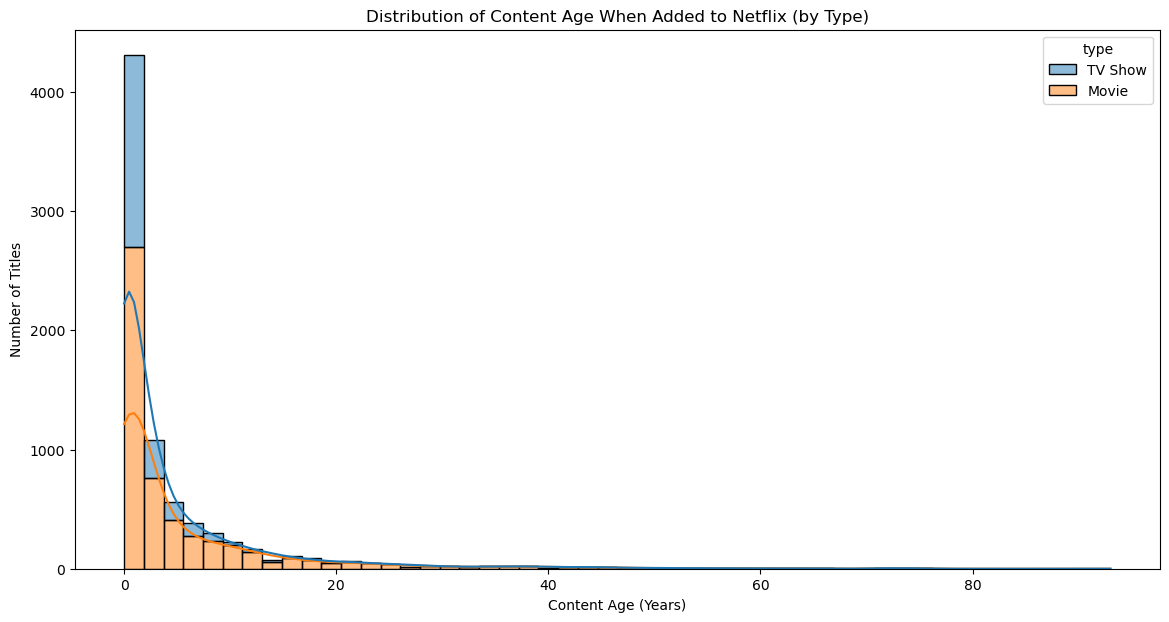

In [9]:
# Create a new feature for the age of the content when it was added
df['age_on_netflix'] = df['year_added'] - df['release_year']
content_age = df[df['age_on_netflix'] >= 0]

# Create the histogram
plt.figure(figsize=(14, 7))
sns.histplot(data=content_age, x='age_on_netflix', hue='type', multiple='stack', bins=50, kde=True)
plt.title('Distribution of Content Age When Added to Netflix (by Type)')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

### Insights on Content Age vs. Type

- **A Strong Focus on New and Timely Content:** The most significant feature of your plot is the massive spike at the 0-year mark. This shows that a huge portion of Netflix's library, for both movies and TV shows, is added in the very same year it's released. This is key to staying relevant, creating buzz with new releases, and attracting new subscribers.

- **The "Long Tail" Strategy for Library Depth:** After the initial spike, you can see a "long tail" of content stretching out for decades. This demonstrates Netflix's other major strategy: acquiring older, licensed content to build a deep and diverse library. This is especially true for movies, which make up the bulk of the content older than 10 years.

- **Movies as Key "Library Fillers":** The chart clearly shows that older content (anything over 5-10 years old) is much more likely to be a movie than a TV show. This suggests Netflix uses classic or popular older films as a cost-effective way to ensure there's always something to watch, keeping subscribers engaged beyond the latest hit series.

- **TV Shows are More Time-Sensitive:** The number of TV shows drops off much more quickly than movies as the content age increases. This implies that TV shows, which are often serialized and part of an ongoing cultural conversation, are most valuable when they are new.

### Q3. Trends in Content Production (Release Year vs. Year Added)

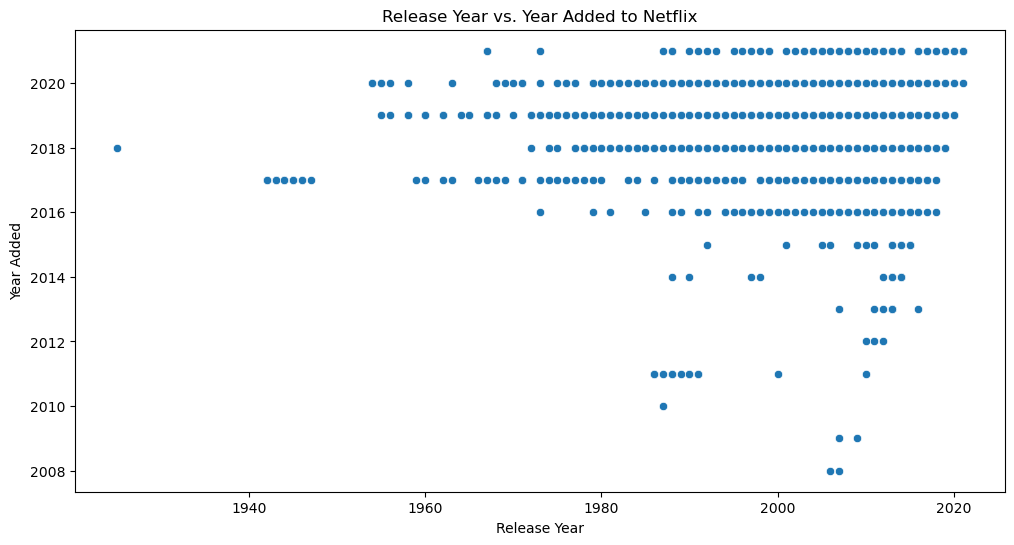

In [10]:
# Create the scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='release_year', y='year_added')
plt.title('Release Year vs. Year Added to Netflix')
plt.xlabel('Release Year')
plt.ylabel('Year Added')
plt.show()

### Insights from Release Year vs. Year Added
This visualization clearly illustrates the two main pillars of Netflix's content strategy: keeping the library current and building a deep back-catalog.

- **A Strong Focus on Recency:** The most obvious pattern is the dense diagonal line running from the bottom-left to the top-right. This line represents content that was added to Netflix in the same year it was released. This shows a primary strategy to acquire and promote new, timely, and buzzworthy content, including their own "Netflix Originals."

- **Building a Deep Back-Catalog:** The large triangular area of points below the diagonal line represents Netflix's "long tail" strategy. It shows that Netflix consistently adds content that is 5, 10, 20, or even 50+ years old. This is crucial for building a diverse library that appeals to a wide range of tastes and moods.

- **Accelerated Content Acquisition in Recent Years:** Notice the distinct vertical lines of data points for the years 2018, 2019, and 2020. This indicates that in recent years, Netflix has been aggressively expanding its library by adding content from a massive range of release years all at once. For example, in 2019 alone, they added everything from brand new 2019 releases to classics from the 1960s.

### Q4. Most Common Word Pairs in Content Descriptions

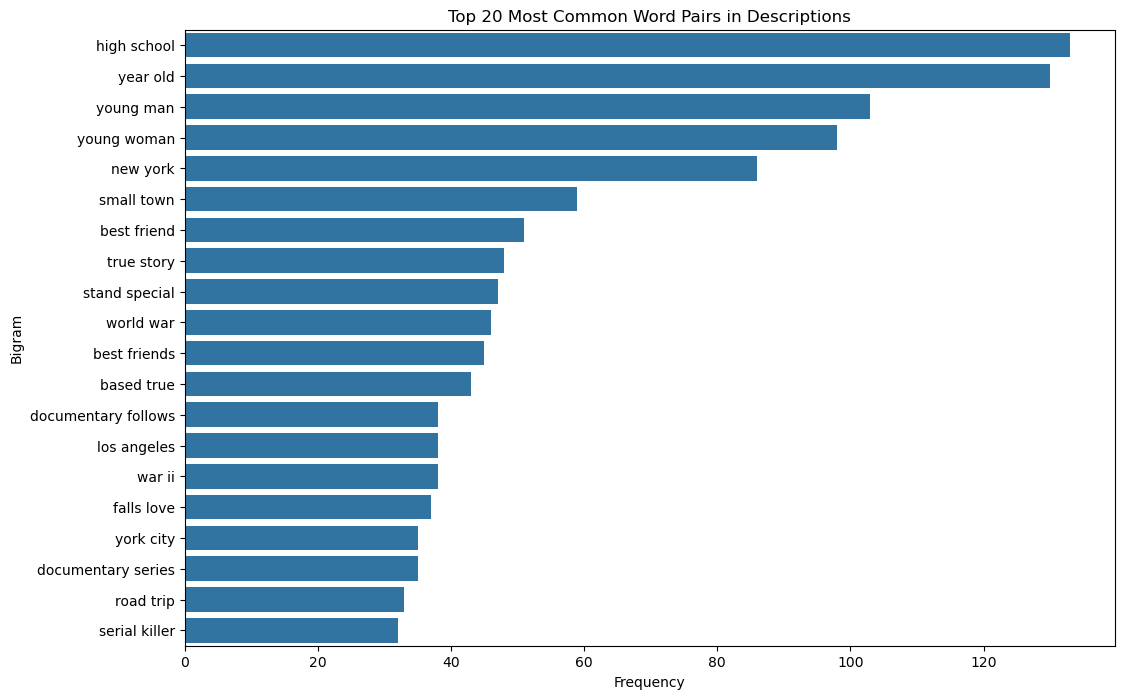

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Combine all descriptions into one block of text
text = " ".join(description for description in df.description)

# Use CountVectorizer to find the most common two-word phrases (bigrams)
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = vectorizer.fit_transform([text])
frequencies = bigrams.sum(axis=0)
word_freq = [(word, frequencies[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)

# Create a DataFrame to display the results
bigram_df = pd.DataFrame(word_freq, columns=['Bigram', 'Frequency'])

# Plot the top 20 most common word pairs
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Bigram', data=bigram_df.head(20))
plt.title('Top 20 Most Common Word Pairs in Descriptions')
plt.show()

### Insights from Common Phrases in Descriptions
This analysis of the content descriptions reveals the core themes and narrative hooks Netflix uses to categorize and describe its content.

- Dominance of Youth and Coming-of-Age Stories: The most frequent phrases are "young man," "high school," and "young woman." This is a strong indicator that a significant portion of Netflix's content is centered around youth, personal discovery, and the challenges of growing up. This is a clear strategy to capture the valuable teen and young adult demographic.

- Clear Signposts for Popular Genres: The word pairs act as a cheat sheet for the most common genres on the platform.

    - Thrillers & Crime: Phrases like "special agent" and "dark secrets" point to a large collection of mystery, thriller, and crime dramas.

    - Comedy: The presence of "stand comedy" directly reflects Netflix's heavy investment in stand-up comedy specials.

    - Drama & History: "World War" indicates a focus on historical dramas and war films.

- Use of Familiar Storytelling Tropes: Phrases like "love story," "group friends," and the common setting of "New York" highlight a reliance on classic and relatable narrative structures. By using these familiar tropes, Netflix can quickly signal the type of story an audience can expect, making it easier for viewers to find content they'll enjoy.

### Q5. Top Directors on Netflix

C:\Users\Asus\AppData\Local\Temp\ipykernel_21096\1840805984.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(10), palette='viridis')


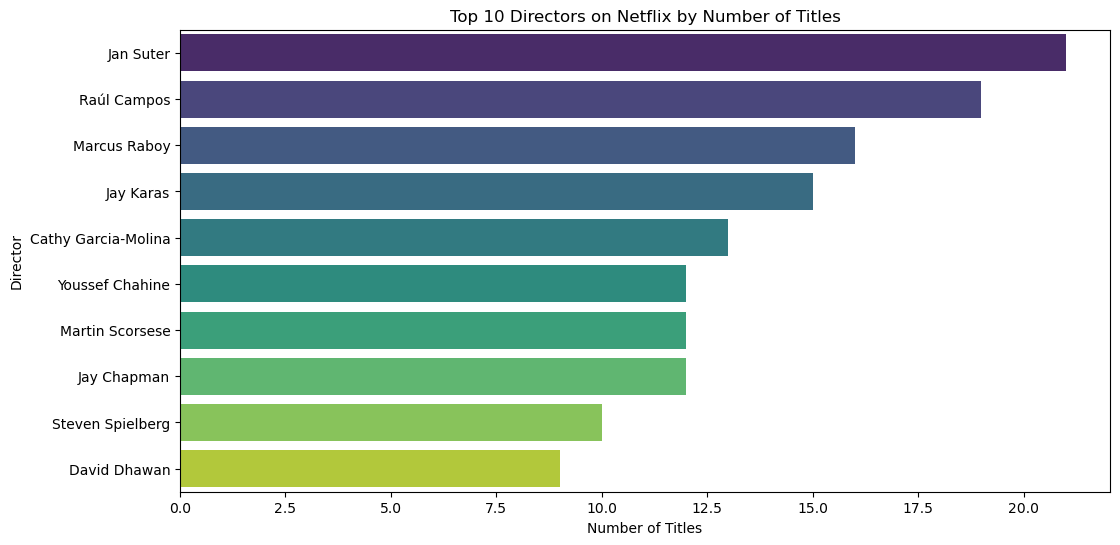

In [12]:
# Split the 'director' column for titles with multiple directors
directors = df.assign(director=df['director'].str.split(', ')).explode('director')

# Remove the 'Unknown' directors from the analysis
directors = directors[directors['director'] != 'Unknown']

# Get the top 10 directors by title count
top_directors = directors['director'].value_counts().reset_index()
top_directors.columns = ['Director', 'Number of Titles']

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(y='Director', x='Number of Titles', data=top_directors.head(10), palette='viridis')
plt.title('Top 10 Directors on Netflix by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

### Insights on Top Directors
- **Niche Specialists Rule:** The top directors aren't famous filmmakers, but specialists like Raúl Campos and Jan Suter who direct a high volume of content, particularly stand-up comedy specials.

- **Comedy is a Key Strategy:** The dominance of comedy special directors shows Netflix uses this genre to add new, cost-effective content to its library consistently.

- **Global Focus:** The top directors specializing in Spanish-language content highlights Netflix's strategy to cater to a global audience, not just an American one.

- **Quantity and Prestige:** This strategy reveals a dual approach: using specialists for a steady stream of content while partnering with A-list directors for prestigious, award-winning films.